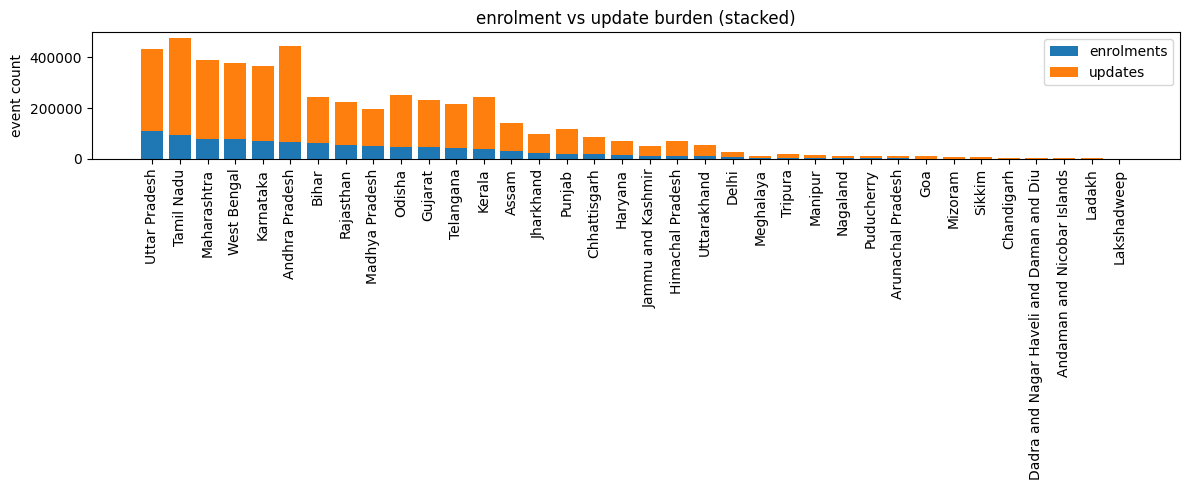

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrol=enrolment.groupby("state").size().reset_index(name="enrolments")

demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")
updates=pd.concat([demo,bio]).groupby("state").size().reset_index(name="updates")

df=enrol.merge(updates,on="state",how="inner")
df=df.sort_values("enrolments",ascending=False)

plt.figure(figsize=(12,5))
plt.bar(df["state"],df["enrolments"],label="enrolments")
plt.bar(df["state"],df["updates"],bottom=df["enrolments"],label="updates")
plt.xticks(rotation=90)
plt.ylabel("event count")
plt.title("enrolment vs update burden (stacked)")
plt.legend()
plt.tight_layout()
plt.show()
